In [4]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 6.4 MB/s eta 0:00:0000:0100:01m


In [2]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
# Import data
dataset_raw = 'data/alzheimers_disease_data.csv'
dataset_raw_df = pd.read_csv(dataset_raw)

In [4]:
df_clean = dataset_raw_df.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop IDs if present
scaler = StandardScaler()

In [5]:
x = df_clean.drop(columns=['Diagnosis'])
y = df_clean['Diagnosis']

x_scaled = scaler.fit_transform(x)

In [6]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

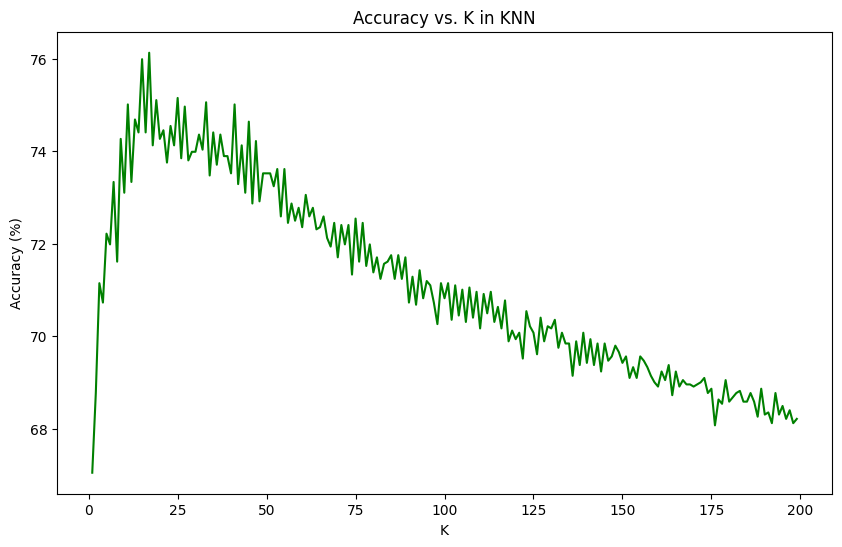

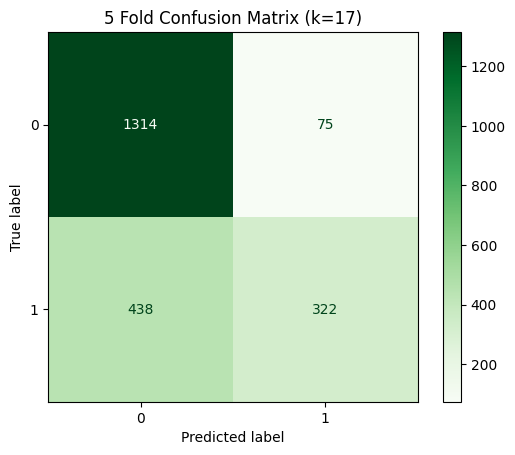

5 Fold Performance: Best k = 17 - Accuracy = 76.12843182875756


In [11]:
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='green')
plt.title('Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Greens')
plt.title(f'5 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"5 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")

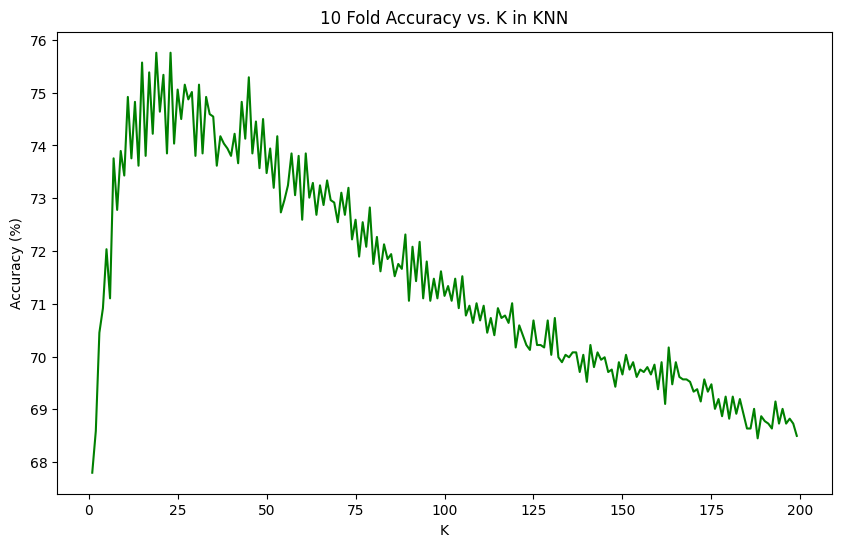

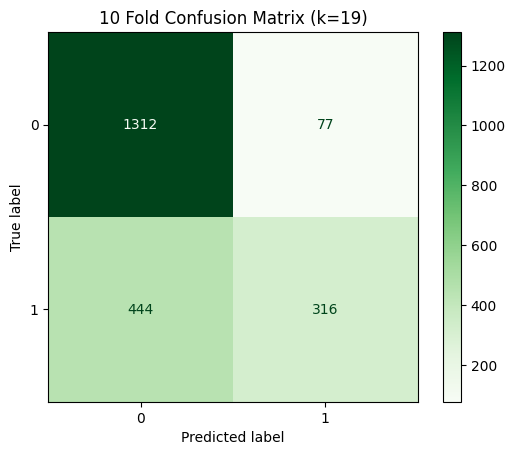

10 Fold Performance: Best k = 19 - Accuracy = 75.75616565844578


In [15]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='green')
plt.title('10 Fold Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Greens')
plt.title(f'10 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"10 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")

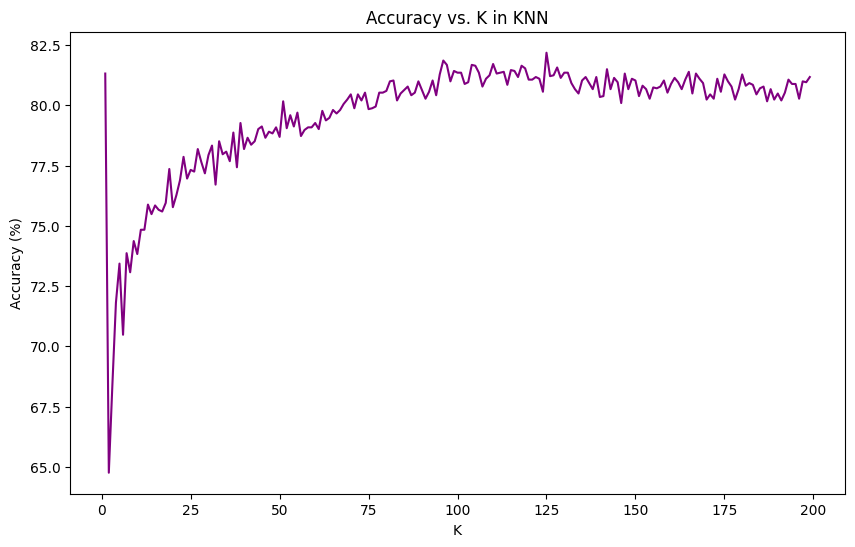

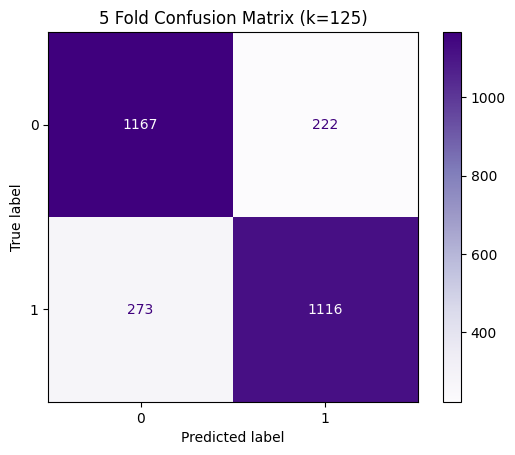

5 Fold Performance: Best k = 125 - Accuracy = 82.18142548596113


In [18]:
dataset_oversampled = 'data/alzheimers_disease_data_oversampled.csv'
dataset_oversampled_df = pd.read_csv(dataset_oversampled)

df_clean = dataset_oversampled_df.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop IDs if present
scaler = StandardScaler()
x = df_clean.drop(columns=['Diagnosis'])
y = df_clean['Diagnosis']
x_scaled = scaler.fit_transform(x)
cv = StratifiedKFold(n_splits=5, shuffle=True)
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='purple')
plt.title('Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Purples')
plt.title(f'5 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"5 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")

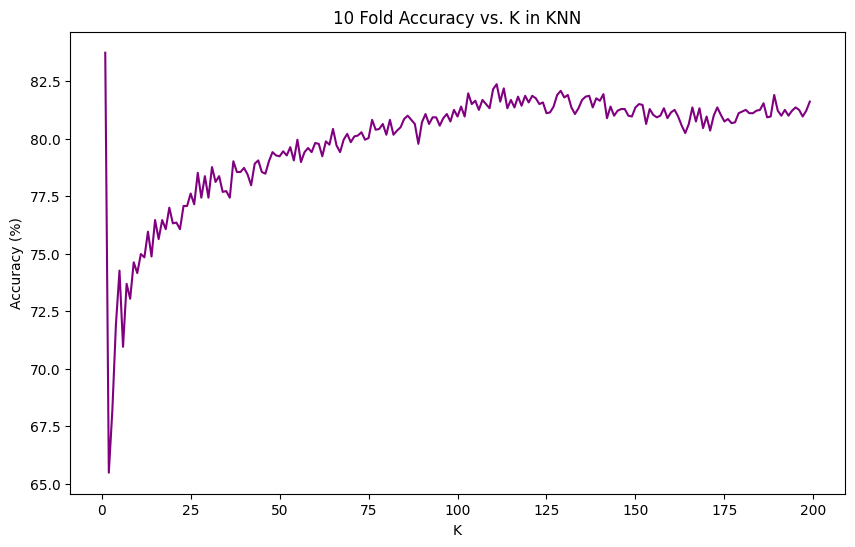

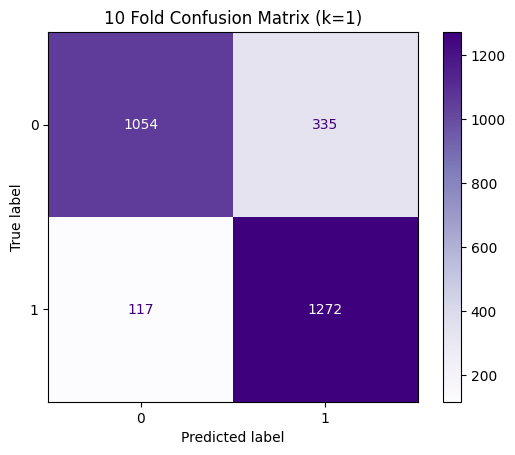

10 Fold Performance: Best k = 1 - Accuracy = 83.72930165586753


In [20]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='purple')
plt.title('10 Fold Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Purples')
plt.title(f'10 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"10 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")

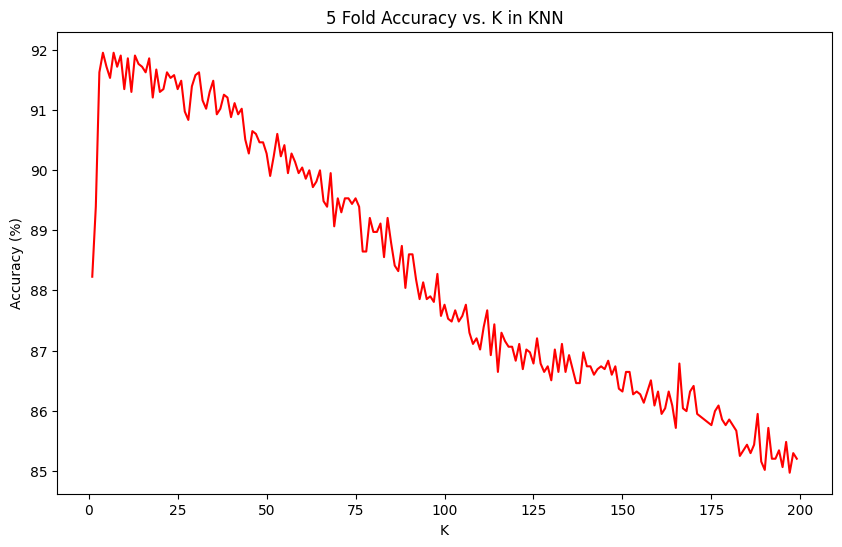

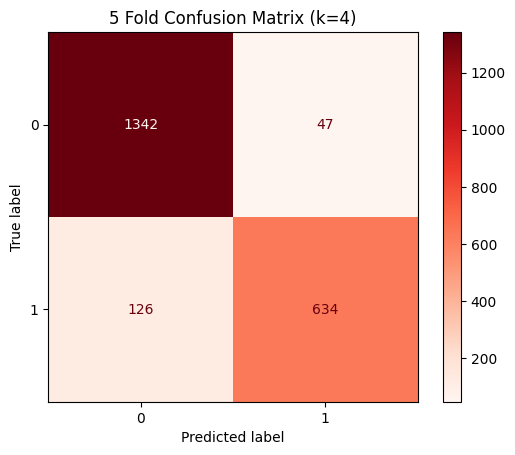

5 Fold Performance: Best k = 4 - Accuracy = 91.94974406700791


In [23]:
dataset_cleaned = 'data/alzheimers_disease_cleaned.csv'
dataset_cleaned_df = pd.read_csv(dataset_cleaned)
df_clean = dataset_cleaned_df #.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop IDs if present

scaler = StandardScaler()
x = df_clean.drop(columns=['Diagnosis'])
y = df_clean['Diagnosis']
x_scaled = scaler.fit_transform(x)

cv = StratifiedKFold(n_splits=5, shuffle=True)
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='red')
plt.title('5 Fold Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Reds')
plt.title(f'5 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"5 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")

In the final test case of this model, the objective was to achieve >90% accuracy rate. To achieve this, the model was run on the dataset that consists of the top 5 features, as seen in Section 3.2. The correlation analysis showed that Functional Assessment, ADL, MMSE, Behavioral Problems, and Memory Complaints were the most important in deteriminig alzheimers diagnosis. A new data set was created titled: alzheimers_disease_cleaned.csv with these features and diagnosis only. After running the model on alzheimers_disease_cleaned.csv, with a 5 fold cross validation, we saw the same decrease in accuracy over K from the raw data model in section 5.1, but with overall higher accuracies. 

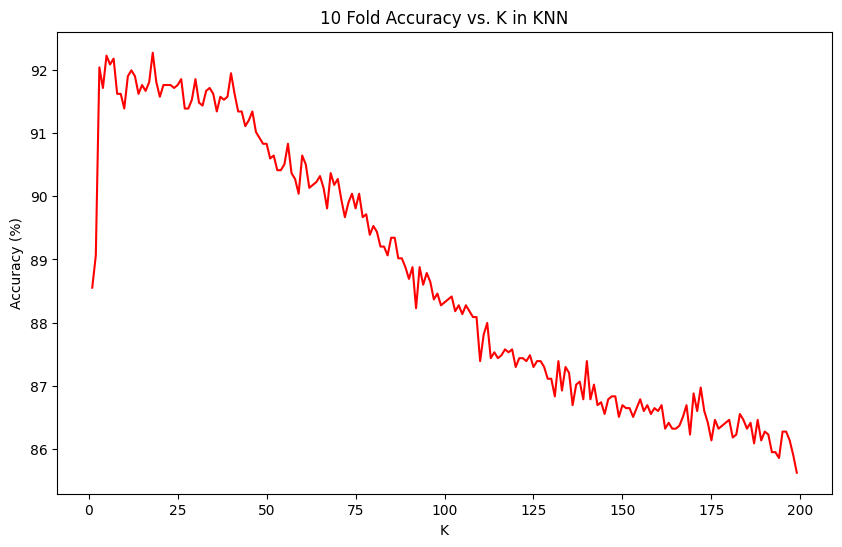

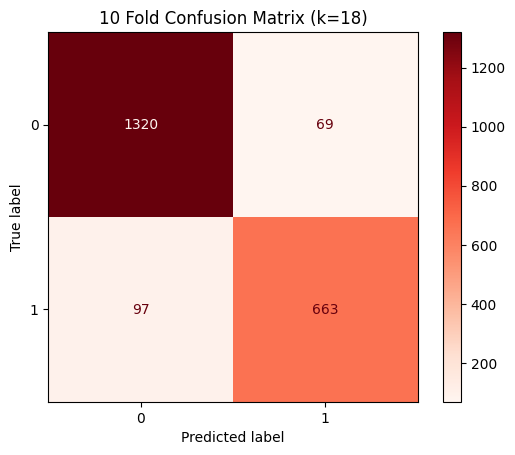

10 Fold Performance: Best k = 18 - Accuracy = 92.27547696603071


In [22]:
cv = StratifiedKFold(n_splits=10, shuffle=True)
highest_accuracy = 0
accuracies = []
best_k = 0
for k in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, x_scaled, y, cv=cv)

    accuracy = accuracy_score(y, y_pred) * 100
    accuracies.append(accuracy)
    if(accuracy > highest_accuracy):
        highest_accuracy = accuracy
        best_k = k
        best_cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 200), accuracies, color='red')
plt.title('10 Fold Accuracy vs. K in KNN')
plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.show()

ConfusionMatrixDisplay(confusion_matrix=best_cm).plot(cmap='Reds')
plt.title(f'10 Fold Confusion Matrix (k={best_k})')
plt.show()

print(f"10 Fold Performance: Best k = {best_k} - Accuracy = {highest_accuracy}")